In [ ]:
# plan: 
# 1. overall wer distribution study "*_all_model_wer.csv", compare F/M, dialect type, 
# 2. detailed error case study "transcription_v*.csv"


In [7]:
import numpy as np

In [1]:
import pandas as pd
df_whisper = pd.read_csv('/users/irisz/downloads/acl-nlp-elic/whisper_wer_all.csv')
df_whisper

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,chunk_name,file_tier,start,end,start_id,end_id,text,...,transcription_v9_wer_i,transcription_v9_wer_c,transcription_v9_wer_n,transcription_v10_wer_wer,transcription_v10_wer_s,transcription_v10_wer_d,transcription_v10_wer_i,transcription_v10_wer_c,transcription_v10_wer_n,audio_file
0,0,0,0,ckm016-2023-06-10-Klana_11_1,1,58.423887,66.423887,0,3,Kadi je bilo to igralište? Stara škola? Ove šk...,...,1.0,3,9,44.444444,1,0,3.0,8,9,ckm016
1,1,1,1,ckm016-2023-06-10-Klana_11_2,1,104.806961,112.806961,3,4,Mhm.,...,0.0,1,1,1400.000000,0,1,13.0,0,1,ckm016
2,2,2,2,ckm016-2023-06-10-Klana_11_3,1,121.928030,129.928030,4,5,"Jezik ili zajik, kako rečete?",...,0.0,5,5,280.000000,2,0,12.0,3,5,ckm016
3,3,3,3,ckm016-2023-06-10-Klana_11_4,1,247.277273,255.277273,5,7,Mhm. Kako se zoveju dijelovi Klane?,...,2.0,3,6,180.000000,0,1,8.0,4,5,ckm016
4,6,6,6,ckm016-2023-06-10-Klana_11_7,1,353.891611,361.891611,10,12,"((another speaker)) Man ja još par pitanji, ev...",...,7.0,0,7,128.571429,2,2,5.0,3,7,ckm016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1202,47,47,ckm016-2023-06-10-Klana_01_43,2,537.623607,547.918609,132,136,Ena besida po čet- ma četiri značenja. Kaj ja ...,...,0.0,12,18,55.555556,3,6,1.0,9,18,ckm016
1201,1203,48,48,ckm016-2023-06-10-Klana_01_44,2,549.809773,561.921870,136,141,"je bilo kada je bilo, je bilo. Tako, ena besid...",...,0.0,23,27,42.857143,10,2,0.0,16,28,ckm016
1202,1204,49,49,ckm016-2023-06-10-Klana_01_45,2,562.413725,572.910289,141,144,"drukčiji je naglasak, ali ista besida je za pa...",...,1.0,16,17,17.647059,2,1,0.0,14,17,ckm016
1203,1205,50,50,ckm016-2023-06-10-Klana_01_46,2,573.805672,585.819354,144,148,"puno- (.) puno- jeziki, ljudi su od sih nič pr...",...,1.0,16,18,22.222222,3,0,1.0,15,18,ckm016


In [2]:
df_elpis = pd.read_csv('/users/irisz/downloads/elpis_result/elpis_wer_all.csv')
df_elpis

,Unnamed: 0,Unnamed: 0.1,index,chunk_name,file_tier,xmin,xmax,start_id,end_id,text,text_clean,transcription,wer,wer_value,audio_file
0,0,0,0,2_1,2,0.944308,12.977866,0,1,((church bell chimes)) I- od majhaniga (.) smo...,"['i', 'od', 'majhaniga', 'smo', 'skijali', 'od...","['ki', 'zna', 'smo', 'šli', 'na', 'on', 'ormar...","(160.0, 3, 15, 14, 2, 20)",160.000000,ckm016
1,1,1,1,2_2,2,12.977866,23.391233,1,8,((church bell chimes)) ((church bell chimes)) ...,"['postoli', 'ni', 'bilo', 'baš', 'pravih', 'no...","['po', 'po', 'školun', 'ni', 'bilo', 'baš', 'p...","(169.23076923076923, 4, 5, 13, 4, 13)",169.230769,ckm016
2,2,2,2,2_3,2,23.391233,34.109459,8,11,"((church bell chimes)) I onda, (.) kamo ćeš st...","['i', 'onda', 'kamo', 'ćeš', 'stavit', 'noge',...","['znan', 'da', 'tamo', 'ćeš', 'cvale', 'nove',...","(133.33333333333331, 7, 14, 11, 3, 24)",133.333333,ckm016
3,3,3,3,2_4,2,34.475491,44.478272,11,15,((church bell chimes)) ako ih staviš naglo va-...,"['ako', 'ih', 'staviš', 'naglo', 'va', 'va', '...","['ako', 'je', 'forši', 'ja', 'provala', 'pa', ...","(135.29411764705884, 1, 12, 10, 4, 17)",135.294118,ckm016
4,4,4,4,2_5,2,44.478272,55.043942,15,18,Ta ozljeda se je zvala buhanci. ((church bell ...,"['ta', 'ozljeda', 'se', 'je', 'zvala', 'buhanc...","['pa', 'palo', 'va', 'se', 'znalo', 'puhanci',...","(143.47826086956522, 4, 13, 16, 6, 23)",143.478261,ckm016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1084,54,54,1_17,1,516.856055,524.856055,38,39,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm015
1075,1085,55,55,2_39,2,526.121886,536.189398,130,137,"baš klanjski- smo med sobu, na hodniku i tako,...","['baš', 'klanjski', 'smo', 'med', 'sobu', 'na'...","['baš', 'turski', 'smo', 'već', 'to', 'ona', '...","(91.30434782608695, 8, 6, 7, 9, 23)",91.304348,ckm015
1076,1086,56,56,2_40,2,538.166933,551.284034,137,139,"Ne znan, mislin, @- okej, više-manje, ali @ @-...","['ne', 'znan', 'mislin', 'okej', 'višemanje', ...","['nas', 'nami', 'se', 'op', 'težak', 'ja', 're...","(163.63636363636365, 2, 25, 27, 6, 33)",163.636364,ckm015
1077,1087,57,57,2_41,2,551.284034,562.555224,139,143,((breath)) niki ti jako drag ostane za cili ži...,"['niki', 'ti', 'jako', 'drag', 'ostane', 'za',...","['neki', 'jako', 'dragu', 'ostane', 'zateži', ...","(130.0, 8, 15, 16, 7, 30)",130.000000,ckm015


In [3]:
interest_info = 'wer'
cols = []
for i in range(1, 11):
    col = 'transcription_v' + str(int(i)) + '_wer_' + interest_info
    cols.append(col)
cols

['transcription_v1_wer_wer',
 'transcription_v2_wer_wer',
 'transcription_v3_wer_wer',
 'transcription_v4_wer_wer',
 'transcription_v5_wer_wer',
 'transcription_v6_wer_wer',
 'transcription_v7_wer_wer',
 'transcription_v8_wer_wer',
 'transcription_v9_wer_wer',
 'transcription_v10_wer_wer']

In [22]:
cols_2 = ['whisper_' + x.split('_')[1] for x in cols]
cols_2[-1] = "whisper_large_v3"
cols_2 = cols_2 + ['ELPIS']
cols_2

['whisper_v1',
 'whisper_v2',
 'whisper_v3',
 'whisper_v4',
 'whisper_v5',
 'whisper_v6',
 'whisper_v7',
 'whisper_v8',
 'whisper_v9',
 'whisper_large_v3',
 'ELPIS']

In [4]:
df_whisper_wer = df_whisper[cols]
df_whisper_wer

,transcription_v1_wer_wer,transcription_v2_wer_wer,transcription_v3_wer_wer,transcription_v4_wer_wer,transcription_v5_wer_wer,transcription_v6_wer_wer,transcription_v7_wer_wer,transcription_v8_wer_wer,transcription_v9_wer_wer,transcription_v10_wer_wer
0,100.000000,111.111111,44.444444,55.555556,62.500000,77.777778,66.666667,88.888889,77.777778,44.444444
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000
2,20.000000,20.000000,20.000000,0.000000,20.000000,20.000000,0.000000,0.000000,0.000000,280.000000
3,33.333333,60.000000,20.000000,40.000000,66.666667,33.333333,66.666667,33.333333,83.333333,180.000000
4,185.714286,228.571429,128.571429,150.000000,371.428571,83.333333,828.571429,142.857143,200.000000,128.571429
...,...,...,...,...,...,...,...,...,...,...
1200,50.000000,238.888889,41.176471,77.777778,50.000000,27.777778,38.888889,27.777778,33.333333,55.555556
1201,32.142857,24.137931,17.857143,46.428571,110.714286,25.000000,17.857143,25.000000,14.814815,42.857143
1202,23.529412,6.250000,17.647059,23.529412,444.444444,222.222222,11.764706,0.000000,11.764706,17.647059
1203,50.000000,50.000000,0.000000,27.777778,235.294118,0.000000,16.666667,0.000000,16.666667,22.222222


In [25]:
df_whisper_wer = df_whisper_wer.replace([np.inf, -np.inf], np.nan).dropna()
df_whisper_wer

,transcription_v1_wer_wer,transcription_v2_wer_wer,transcription_v3_wer_wer,transcription_v4_wer_wer,transcription_v5_wer_wer,transcription_v6_wer_wer,transcription_v7_wer_wer,transcription_v8_wer_wer,transcription_v9_wer_wer,transcription_v10_wer_wer
0,100.000000,111.111111,44.444444,55.555556,62.500000,77.777778,66.666667,88.888889,77.777778,44.444444
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000
2,20.000000,20.000000,20.000000,0.000000,20.000000,20.000000,0.000000,0.000000,0.000000,280.000000
3,33.333333,60.000000,20.000000,40.000000,66.666667,33.333333,66.666667,33.333333,83.333333,180.000000
4,185.714286,228.571429,128.571429,150.000000,371.428571,83.333333,828.571429,142.857143,200.000000,128.571429
...,...,...,...,...,...,...,...,...,...,...
1200,50.000000,238.888889,41.176471,77.777778,50.000000,27.777778,38.888889,27.777778,33.333333,55.555556
1201,32.142857,24.137931,17.857143,46.428571,110.714286,25.000000,17.857143,25.000000,14.814815,42.857143
1202,23.529412,6.250000,17.647059,23.529412,444.444444,222.222222,11.764706,0.000000,11.764706,17.647059
1203,50.000000,50.000000,0.000000,27.777778,235.294118,0.000000,16.666667,0.000000,16.666667,22.222222


In [11]:
df_elpis_wer = df_elpis[['wer_value']]
df_elpis_wer['wer_value'] = df_elpis_wer['wer_value'].replace([np.inf, -np.inf], np.nan)
df_elpis_wer =df_elpis_wer.dropna()
df_elpis_wer

<ipython-input-11-da4456c36ee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elpis_wer['wer_value'] = df_elpis_wer['wer_value'].replace([np.inf, -np.inf], np.nan)


,wer_value
0,160.000000
1,169.230769
2,133.333333
3,135.294118
4,143.478261
...,...
1073,93.939394
1075,91.304348
1076,163.636364
1077,130.000000


In [26]:
df_all = pd.concat([df_whisper_wer, df_elpis_wer], axis=1) 
df_all

,transcription_v1_wer_wer,transcription_v2_wer_wer,transcription_v3_wer_wer,transcription_v4_wer_wer,transcription_v5_wer_wer,transcription_v6_wer_wer,transcription_v7_wer_wer,transcription_v8_wer_wer,transcription_v9_wer_wer,transcription_v10_wer_wer,wer_value
0,100.000000,111.111111,44.444444,55.555556,62.500000,77.777778,66.666667,88.888889,77.777778,44.444444,160.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000,169.230769
2,20.000000,20.000000,20.000000,0.000000,20.000000,20.000000,0.000000,0.000000,0.000000,280.000000,133.333333
3,33.333333,60.000000,20.000000,40.000000,66.666667,33.333333,66.666667,33.333333,83.333333,180.000000,135.294118
4,185.714286,228.571429,128.571429,150.000000,371.428571,83.333333,828.571429,142.857143,200.000000,128.571429,143.478261
...,...,...,...,...,...,...,...,...,...,...,...
1200,50.000000,238.888889,41.176471,77.777778,50.000000,27.777778,38.888889,27.777778,33.333333,55.555556,NaN
1201,32.142857,24.137931,17.857143,46.428571,110.714286,25.000000,17.857143,25.000000,14.814815,42.857143,NaN
1202,23.529412,6.250000,17.647059,23.529412,444.444444,222.222222,11.764706,0.000000,11.764706,17.647059,NaN
1203,50.000000,50.000000,0.000000,27.777778,235.294118,0.000000,16.666667,0.000000,16.666667,22.222222,NaN


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-30-06bb0af8b8fc>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cols_2)


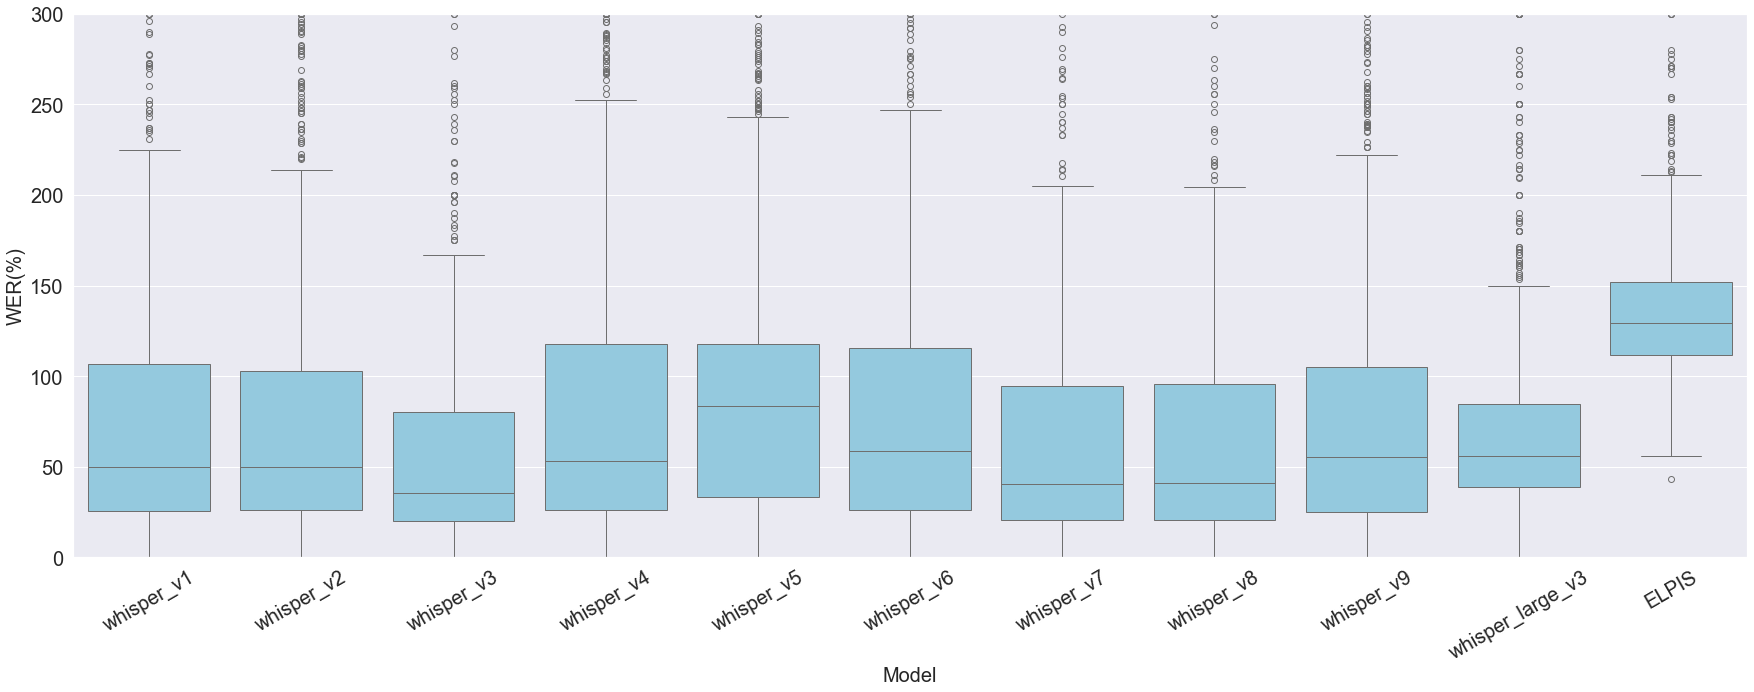

In [30]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_all), color='skyblue')

ax.tick_params(labelsize=20)
ax.set_xticklabels(cols_2)
ax.set_xlabel("Model",fontsize=20)
ax.set_ylabel("WER(%)",fontsize=20)
sns.set_theme(rc={'figure.figsize':(30, 10)}, style="darkgrid")
#sns.set(font_scale = 1)
plt.ylim(0, 300)
plt.xticks(rotation=30)
plt.show()
ax.figure.savefig('/users/irisz/downloads/acl-nlp-elic/whisper_elpis_wer.png',dpi=600, bbox_inches="tight")

In [28]:
df_all.describe()

,transcription_v1_wer_wer,transcription_v2_wer_wer,transcription_v3_wer_wer,transcription_v4_wer_wer,transcription_v5_wer_wer,transcription_v6_wer_wer,transcription_v7_wer_wer,transcription_v8_wer_wer,transcription_v9_wer_wer,transcription_v10_wer_wer,wer_value
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1053.000000
mean,90.108283,123.689008,101.642862,111.130537,110.000509,106.742057,74.285960,81.085143,114.857734,102.143943,166.745936
std,200.562682,480.056056,444.441628,269.878388,218.894810,226.415322,149.708306,169.300722,240.445928,234.328030,200.939068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.478261
25%,25.806452,25.925926,20.000000,26.315789,33.333333,26.086957,20.833333,20.689655,25.000000,38.636364,111.428571
50%,50.000000,50.000000,35.483871,53.125000,83.333333,58.823529,40.740741,40.909091,55.172414,56.000000,129.411765
75%,106.779661,103.030303,80.000000,117.647059,117.777778,115.384615,94.736842,95.652174,105.263158,84.615385,151.724138
max,3700.000000,10900.000000,8600.000000,7000.000000,6600.000000,4700.000000,3000.000000,3100.000000,3300.000000,3000.000000,2500.000000
